# Abstract

* GAN architecture with ideas borrowed from Style Transfer Literature

Leads to:
* Unsupervised separation of high level attributes
* enables intuitive, scale-specific control of the synthesis

+ State of the art in terms of traditional distribution quality metrics
* Present a highly varied and high quality dataset of human faces

# Introduction

Current GAN algorithms have the following issues, 
* the generators operate as black boxes
* difficulty in understanding the various aspects of the image synthesis process
* properties of the latent space are poorly understood

The proposed generator embeds the input latent code into an intermediate laten space, which has a profound effect on how the factors of variation are represented in the network. 

# Style-based generator

In [4]:
from PIL import Image
img = Image.open('style_based_generator.png')
img.show()

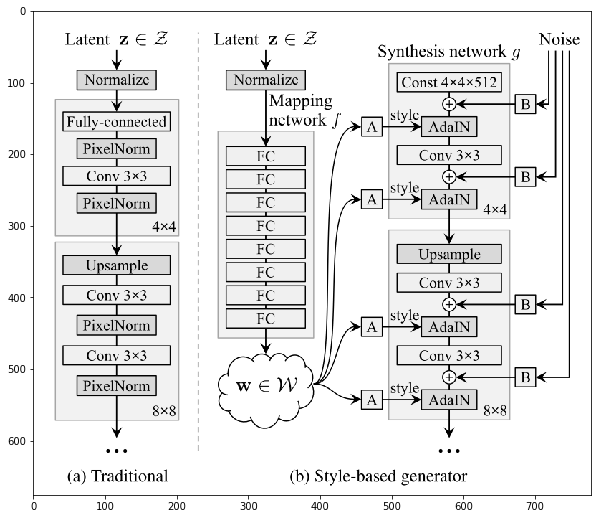

In [10]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
plt.figure(figsize=(10,10))
image = cv2.imread('style_based_generator.png',cv2.IMREAD_GRAYSCALE)
imshow(image,cmap='gray')

While a traditional generator feeds the latent code through the input layer, the style based generator feeds the latent code to first generate a latent space representation constant $w\epsilon W$, which then controls the generator through __**[adaptive instance normalization](https://github.com/xunhuang1995/AdaIN-style) (AdaIN)**__ at each convolution layer. $A$ is the learned affice transform, $B$ applies learned per-channel scaling factors to the noise input, $f$ is a mapping network of 8 layers and $g$ is a synthesis network of 18 layers. The output of the last layer is converted to RGB using a separate $1X1$ convolution. 

AdaIN receives a content input $x$ and a style input $y$, and simply aligns the channelwise
mean and variance of $x$ to match those of $y$. Unlike BN, IN or CIN, AdaIN has no learnable affine parameters.
Instead, it adaptively computes the affine parameters from the style input:

$AdaIN(x,y)=\sigma{y}(\frac{x-\mu (x)}{\sigma (x)})+\mu (y)$

in which the normalized content input are scaled with $\sigma(y)$ and shited with $\mu(y)$.

Comparing the approach to style transfer, they compute the spatially invariant style $y$ from vector $w$ instead of an example image.

More info, videos and results at http://stylegan.xyz/code